# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vung tau
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | kilinochchi
Processing Record 5 of Set 1 | banjar
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | belgrade
Processing Record 13 of Set 1 | oriximina
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | yelovo
Processing Record 16 of Set 1 | koroni
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | assiniboia
Processing Record 19 of Set 1 | fomboni
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 22 of Set 1 | coihaique
Processing 

Processing Record 37 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 4 | ostersund
Processing Record 39 of Set 4 | lubao
Processing Record 40 of Set 4 | san jose
Processing Record 41 of Set 4 | marzuq
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | moron
Processing Record 44 of Set 4 | belaya gora
Processing Record 45 of Set 4 | kuzino
Processing Record 46 of Set 4 | tual
Processing Record 47 of Set 4 | hobart
Processing Record 48 of Set 4 | tuktoyaktuk
Processing Record 49 of Set 4 | songea
Processing Record 0 of Set 5 | yomitan
City not found. Skipping...
Processing Record 1 of Set 5 | bouna
Processing Record 2 of Set 5 | amderma
City not found. Skipping...
Processing Record 3 of Set 5 | manggar
Processing Record 4 of Set 5 | akyab
Processing Record 5 of Set 5 | himora
City not found. Skipping...
Processing Record 6 of Set 5 | pundaguitan
Processing Record 7 of Set 5 | lompoc
Processing Record 8 of Set 5 | sorland
Processing Re

City not found. Skipping...
Processing Record 27 of Set 8 | rzhaksa
Processing Record 28 of Set 8 | morondava
Processing Record 29 of Set 8 | kusye-aleksandrovskiy
City not found. Skipping...
Processing Record 30 of Set 8 | calamar
Processing Record 31 of Set 8 | soyo
Processing Record 32 of Set 8 | annau
Processing Record 33 of Set 8 | passo de camaragibe
Processing Record 34 of Set 8 | hojai
Processing Record 35 of Set 8 | necochea
Processing Record 36 of Set 8 | terney
Processing Record 37 of Set 8 | tabuk
Processing Record 38 of Set 8 | diapaga
Processing Record 39 of Set 8 | faya
Processing Record 40 of Set 8 | spencer
Processing Record 41 of Set 8 | kaitangata
Processing Record 42 of Set 8 | katangli
Processing Record 43 of Set 8 | tyukalinsk
Processing Record 44 of Set 8 | bati
Processing Record 45 of Set 8 | arlit
Processing Record 46 of Set 8 | port hedland
Processing Record 47 of Set 8 | port hawkesbury
Processing Record 48 of Set 8 | maragogi
Processing Record 49 of Set 8 | 

Processing Record 17 of Set 12 | fengxian
Processing Record 18 of Set 12 | virginia beach
Processing Record 19 of Set 12 | sabha
Processing Record 20 of Set 12 | wad madani
Processing Record 21 of Set 12 | oussouye
Processing Record 22 of Set 12 | chornobay
Processing Record 23 of Set 12 | farmington
Processing Record 24 of Set 12 | itarema
Processing Record 25 of Set 12 | kerki
City not found. Skipping...
Processing Record 26 of Set 12 | limbang
Processing Record 27 of Set 12 | marawi
Processing Record 28 of Set 12 | havoysund
Processing Record 29 of Set 12 | campeche
Processing Record 30 of Set 12 | harper
Processing Record 31 of Set 12 | shagamu
Processing Record 32 of Set 12 | dicabisagan
Processing Record 33 of Set 12 | mehran
Processing Record 34 of Set 12 | pangnirtung
Processing Record 35 of Set 12 | santa cruz
Processing Record 36 of Set 12 | portland
Processing Record 37 of Set 12 | iquitos
Processing Record 38 of Set 12 | caldas novas
Processing Record 39 of Set 12 | toliary

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vung tau,10.3460,107.0843,76.41,83,85,9.22,VN,1674754659
1,rikitea,-23.1203,-134.9692,78.89,76,7,18.45,PF,1674754659
2,kruisfontein,-34.0033,24.7314,70.88,74,0,3.31,ZA,1674754660
3,kilinochchi,9.3961,80.3982,73.85,79,86,6.73,LK,1674754662
4,banjar,-8.1900,114.9675,76.55,88,100,3.15,ID,1674754662


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vung tau,10.3460,107.0843,76.41,83,85,9.22,VN,1674754659
1,rikitea,-23.1203,-134.9692,78.89,76,7,18.45,PF,1674754659
2,kruisfontein,-34.0033,24.7314,70.88,74,0,3.31,ZA,1674754660
3,kilinochchi,9.3961,80.3982,73.85,79,86,6.73,LK,1674754662
4,banjar,-8.1900,114.9675,76.55,88,100,3.15,ID,1674754662


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

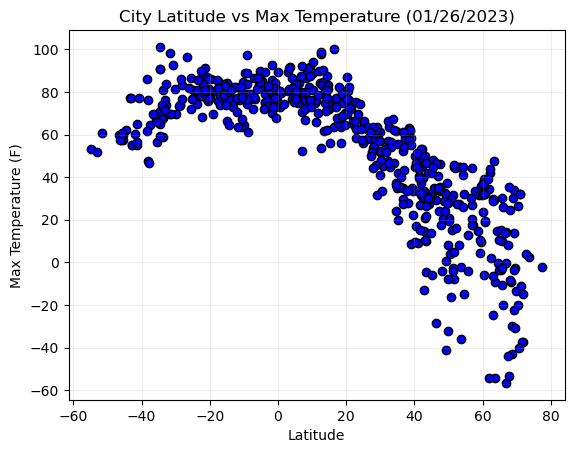

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],c="blue",edgecolors="black")

# Incorporate the other graph properties
todayDate = dt.datetime.today().strftime("%m/%d/%Y")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({todayDate})")
plt.grid(alpha=.2)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

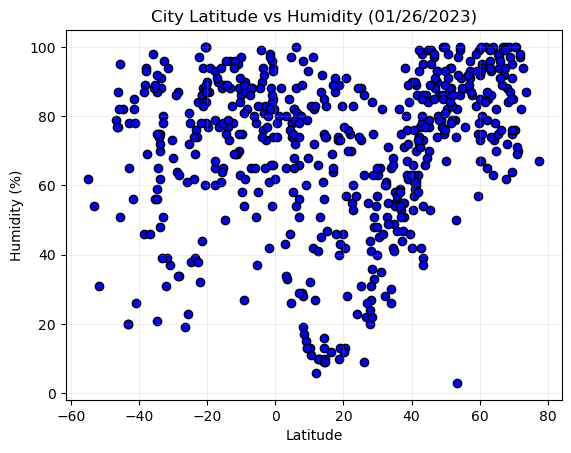

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],c="blue",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({todayDate})")
plt.grid(alpha=.2)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

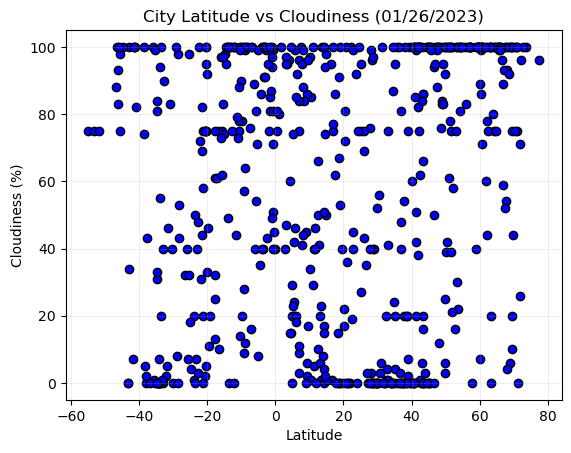

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],c="blue",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({todayDate})")
plt.grid(alpha=.2)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

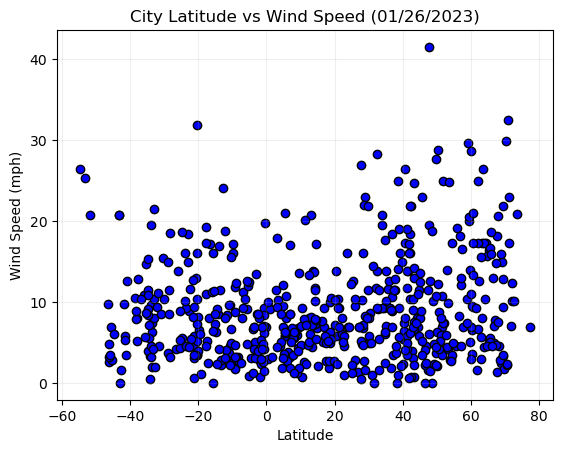

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],c="blue",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({todayDate})")
plt.grid(alpha=.2)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linRegressionPlot(xvalue,yvalue):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    linRegressLine = xvalue * slope + intercept
    
    print(f"The r-value is: {rvalue:}")
    
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,linRegressLine,"r-")
    lineLabelX = np.random.randint(xvalue.min(),xvalue.max())
    lineLabelY = lineLabelX * slope + intercept
    plt.annotate(text=f"y={slope:,.2f}x + {intercept:,.2f}",xy=(lineLabelX,lineLabelY),textcoords="offset points",
                 xytext=(0,10),fontsize=15,color="black",bbox={"facecolor":"red","alpha":.5,"pad":5})
    plt.xlabel(xvalue.name)
    plt.ylabel(yvalue.name)
    return

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vung tau,10.3460,107.0843,76.41,83,85,9.22,VN,1674754659
3,kilinochchi,9.3961,80.3982,73.85,79,86,6.73,LK,1674754662
5,norman wells,65.2820,-126.8329,-3.71,98,100,5.28,CA,1674754663
6,thompson,55.7435,-97.8558,-3.84,77,100,4.61,CA,1674754663
7,albany,42.6001,-73.9662,39.61,71,62,4.00,US,1674754408


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,78.89,76,7,18.45,PF,1674754659
2,kruisfontein,-34.0033,24.7314,70.88,74,0,3.31,ZA,1674754660
4,banjar,-8.1900,114.9675,76.55,88,100,3.15,ID,1674754662
9,vaini,-21.2000,-175.2000,78.96,94,75,4.61,TO,1674754664
12,oriximina,-1.7656,-55.8661,85.84,61,99,0.69,BR,1674754665


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8451572209271178


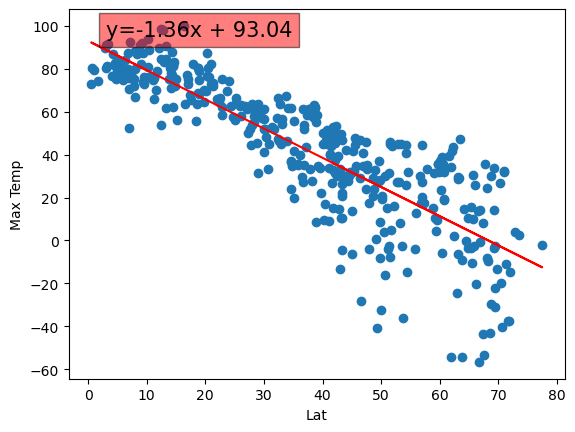

In [15]:
# Linear regression on Northern Hemisphere
linRegressionPlot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

The r-value is: 0.49646729821943536


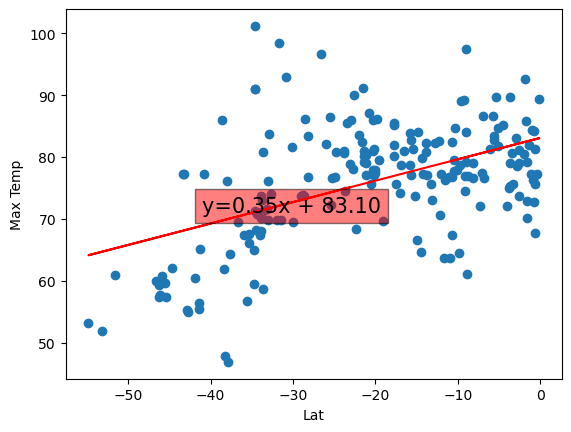

In [16]:
# Linear regression on Southern Hemisphere
linRegressionPlot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** 
There is a moderate to strong linear relationship between a city's latitude and its maximum temperature. In the northern hemisphere, as latitude increases (i.e., as we get closer to the north pole), the maximum temperature for the day decreases. Similarly for the southern hemisphere, as latitude decreases (i.e., as we get closer to the south pole), the maximum temperature decreases. The relationship between these two variables is weaker in the southern hemisphere, however, for the data points gathered.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.48149080201237776


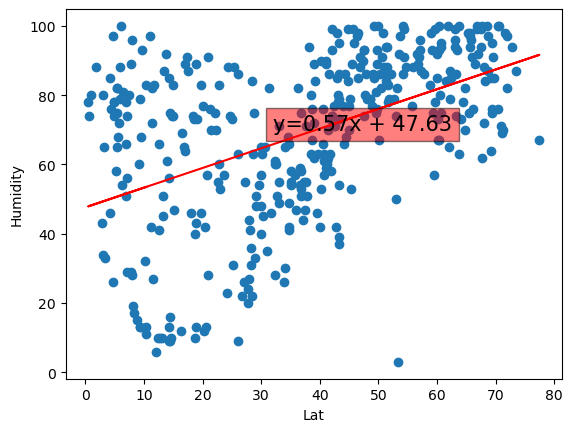

In [17]:
# Northern Hemisphere
linRegressionPlot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

The r-value is: 0.24904373984232037


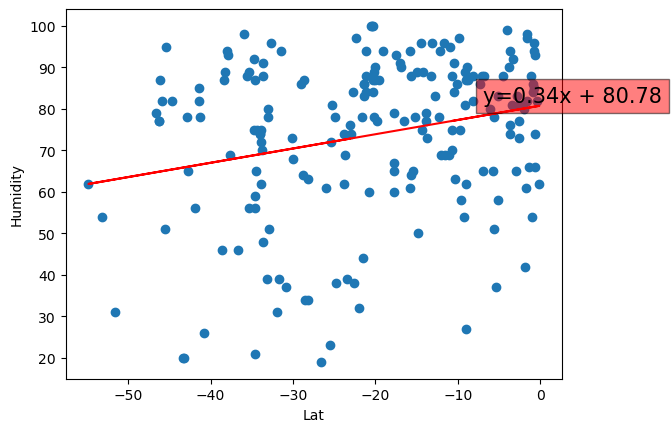

In [18]:
# Southern Hemisphere
linRegressionPlot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** There is a low to moderate positive linear relationship between the latitude of a city and its corresponding humidity. The relationship between these two is stronger in the northern hemisphere than in the southern hemisphere. In both, as latitude increases, humidity increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.30742479764344005


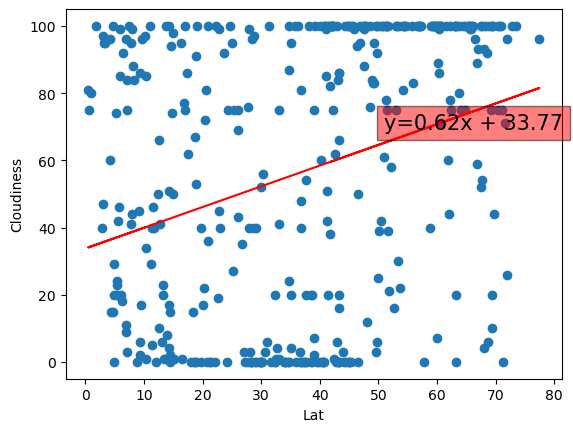

In [19]:
# Northern Hemisphere
linRegressionPlot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

The r-value is: 0.2585161305515205


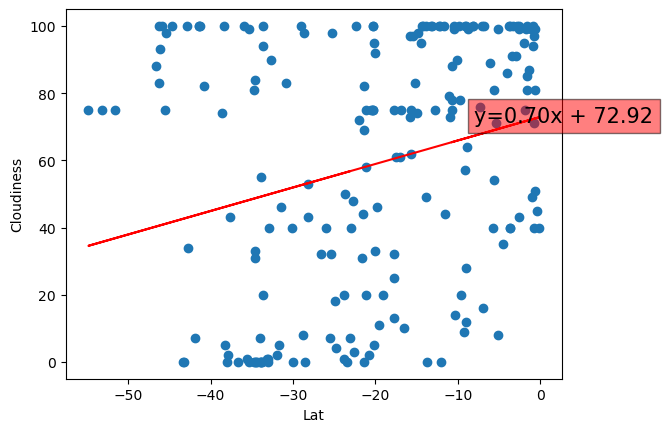

In [20]:
# Southern Hemisphere
linRegressionPlot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** There is a low positive linear relationship between latitude and cloudiness in both the northern and southern hemispheres. As we get closer to the north pole, cloudiness increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.22758642335199264


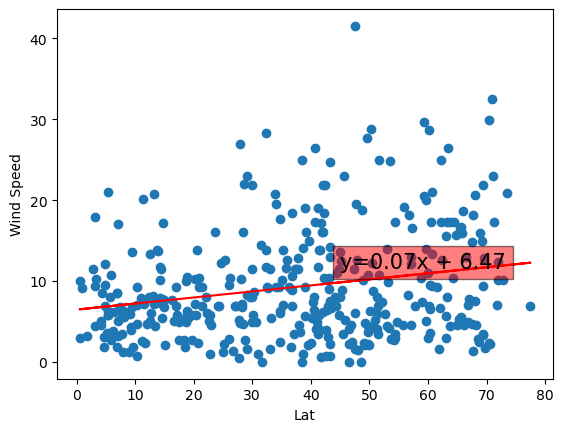

In [21]:
# Northern Hemisphere
linRegressionPlot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

The r-value is: -0.1991909198241448


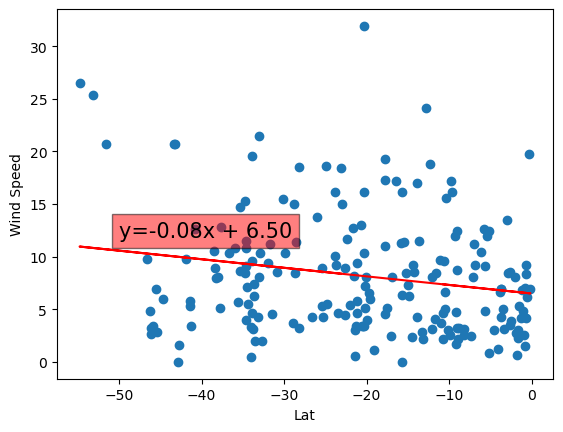

In [22]:
# Southern Hemisphere
linRegressionPlot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** There is a negligible to low linear relationship between latitude and wind speed. In the northern hemisphere, wind speed appears to have a very slight positive linear relationship, but the correlation is very low (r=.15). In the southern hemisphere, wind speed appears to have a slightly stronger negative correlation (r=.3) with latitude.